# Housing Prices
## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/Users/kumarashish/Downloads/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
null_percent = round(100*df.isnull().mean(), 2)
null_percent[null_percent > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

### Handling Missing Data

In [7]:
# Dealing with missing categorical missing first
categorical_missing = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for column in categorical_missing:
    print(column, df[column].unique())
    

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' nan 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [8]:
# we can assign these nan as string NA, as that is a valid category for these variables as per data dictionary
for column in categorical_missing:
    df[column] = df[column].fillna('NA')
null_percent = round(100*df.isnull().mean(), 2)
null_percent[null_percent > 0]


LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [9]:
# GarageYrBlt is na for cases where garage is not available
# LotFrontage and MasVnrArea we can replace with 0 as we are assuming that not available data points represent unavailability
numerical_missing = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for column in numerical_missing:
    df[column] = df[column].fillna(0)
null_percent = round(100*df.isnull().mean(), 2)
null_percent[null_percent > 0]


Series([], dtype: float64)

In [10]:
df = df.drop('Id', axis = 1)
target = df.SalePrice
df = df.drop('SalePrice', axis = 1)

## Step 2: Visualising the Data
#### Visualising Numeric Variables

### Exploring numerical variables first


In [11]:

numerical_variables = [column for column in df.columns if len(df[column].unique()) >= 50]

print("numerical", numerical_variables)

numerical ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


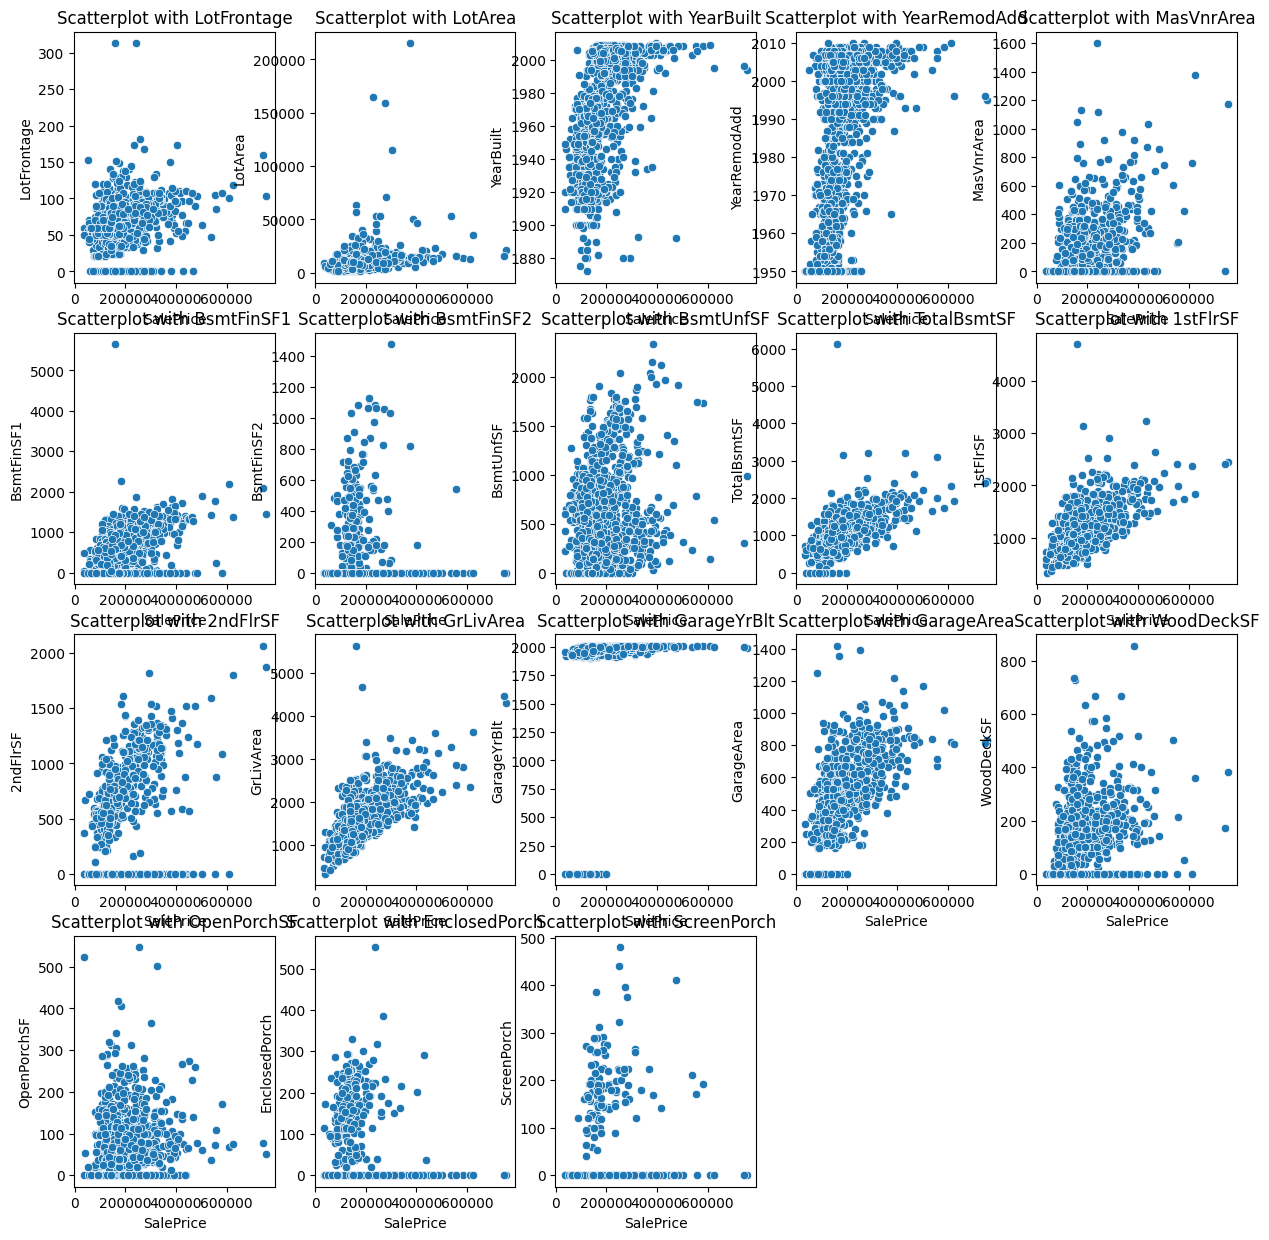

In [13]:
n_cols = 5
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_variables):
    ax =plt.subplot(len(numerical_variables) // n_cols + 1, n_cols, i+1)
    sns.scatterplot(data=df, x=target, y=col)
    ax.set_title("Scatterplot with " + col)

plt.show()

In [14]:
current_year = 2024
df['age'] = current_year - df['YearBuilt']
df['remod_age'] = current_year - df['YearRemodAdd']

### Transforming columns with non linear pattern

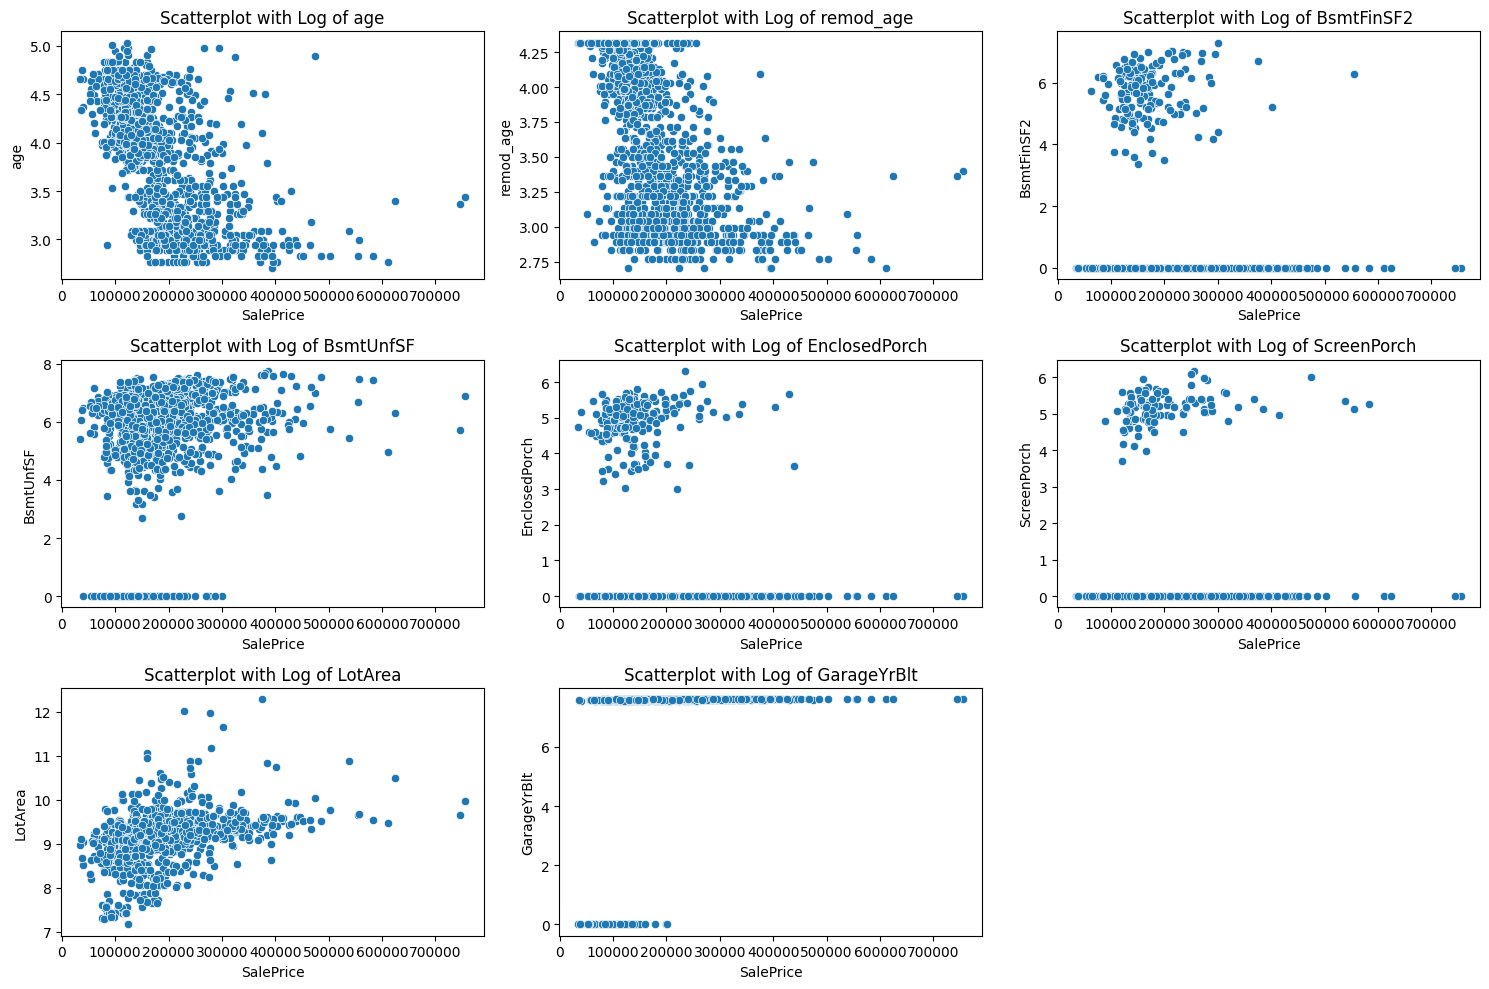

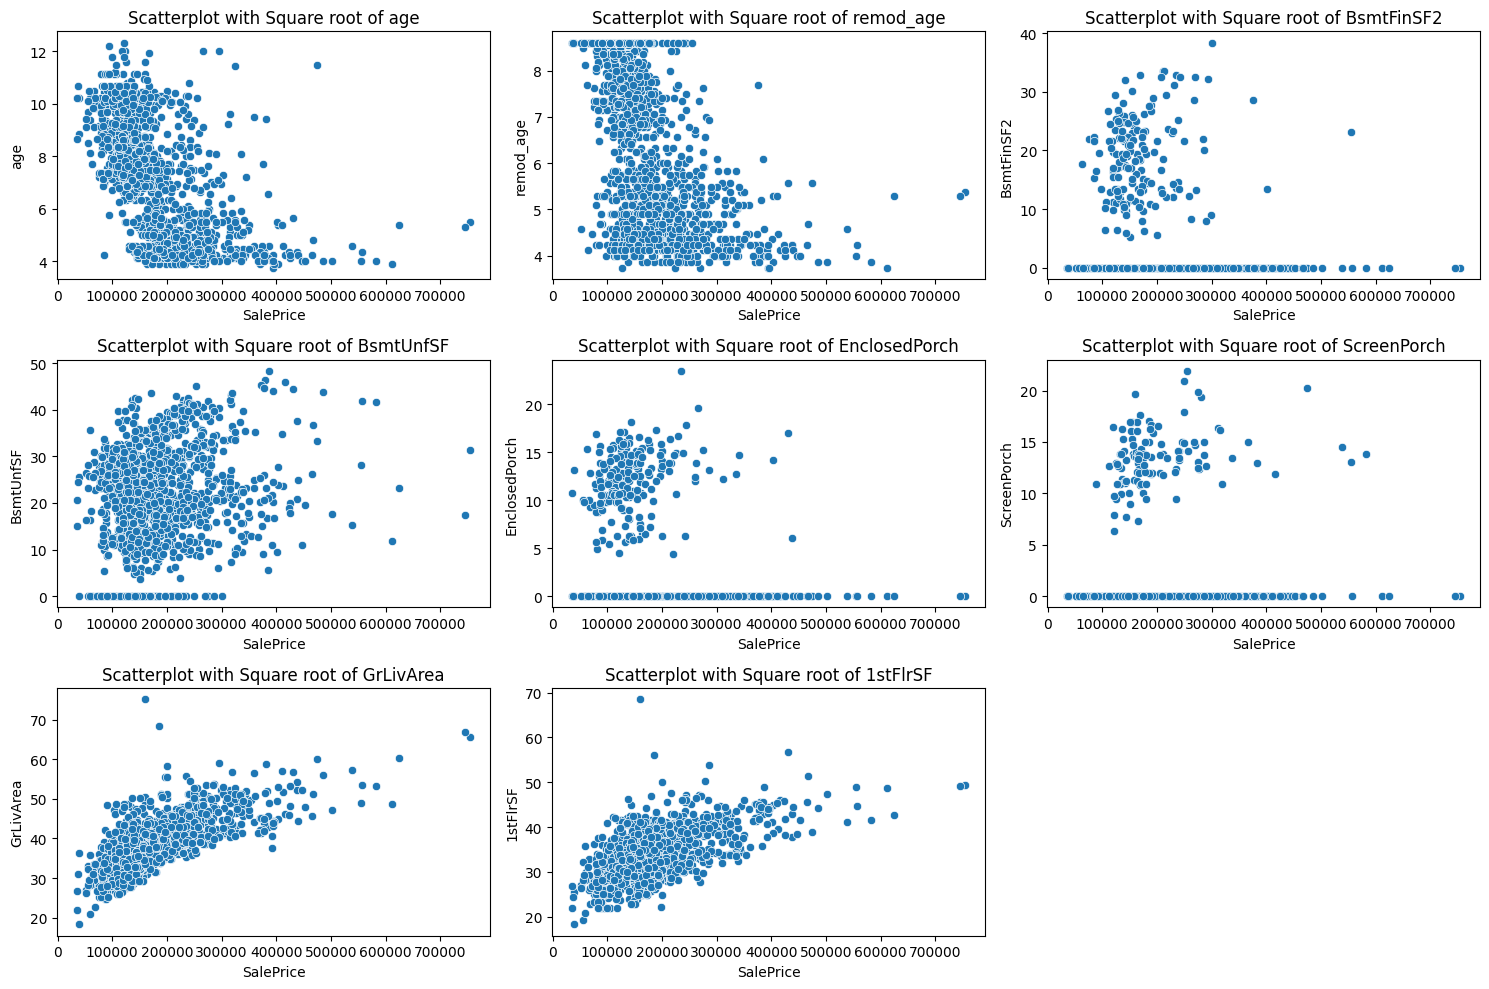

In [15]:
variables_with_outliers = ['LotArea', 'GarageYrBlt']

square_root_variables = ['age', 'remod_age', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'ScreenPorch', 'GrLivArea', '1stFlrSF'] 

logarithmic_variables = ['age', 'remod_age', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'ScreenPorch'] + variables_with_outliers

n_cols = 3
n_rows = (len(logarithmic_variables) + n_cols - 1) // n_cols 
plt.figure(figsize=(15, 10))

for i, col in enumerate(logarithmic_variables):
    plt.subplot(n_rows, n_cols, i + 1)
    
    sns.scatterplot(x=target, y=np.log1p(df[col]))
    plt.title("Scatterplot with Log of " + col)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, col in enumerate(square_root_variables):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=target, y=np.sqrt(df[col]))
    plt.title("Scatterplot with Square root of " + col)

plt.tight_layout()
plt.show()



In [16]:
df['age_log'] = np.log1p(df['age'])
df['remod_age_log'] = np.log1p(df['remod_age'])
df['BsmtFinSF2_log'] = np.log1p(df['BsmtFinSF2'])
df['BsmtUnfSF_sqrt'] = np.sqrt(df['BsmtUnfSF'])
df['EnclosedPorch_log'] = np.sqrt(df['EnclosedPorch'])
df['ScreenPorch_log'] = np.log1p(df['ScreenPorch'])
df['LotArea_log'] = np.log1p(df['LotArea'])

df.drop(columns=['YearBuilt', 'YearRemodAdd', 'age', 'remod_age', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'ScreenPorch', 'LotArea', 'GarageYrBlt'], axis=1, inplace=True)


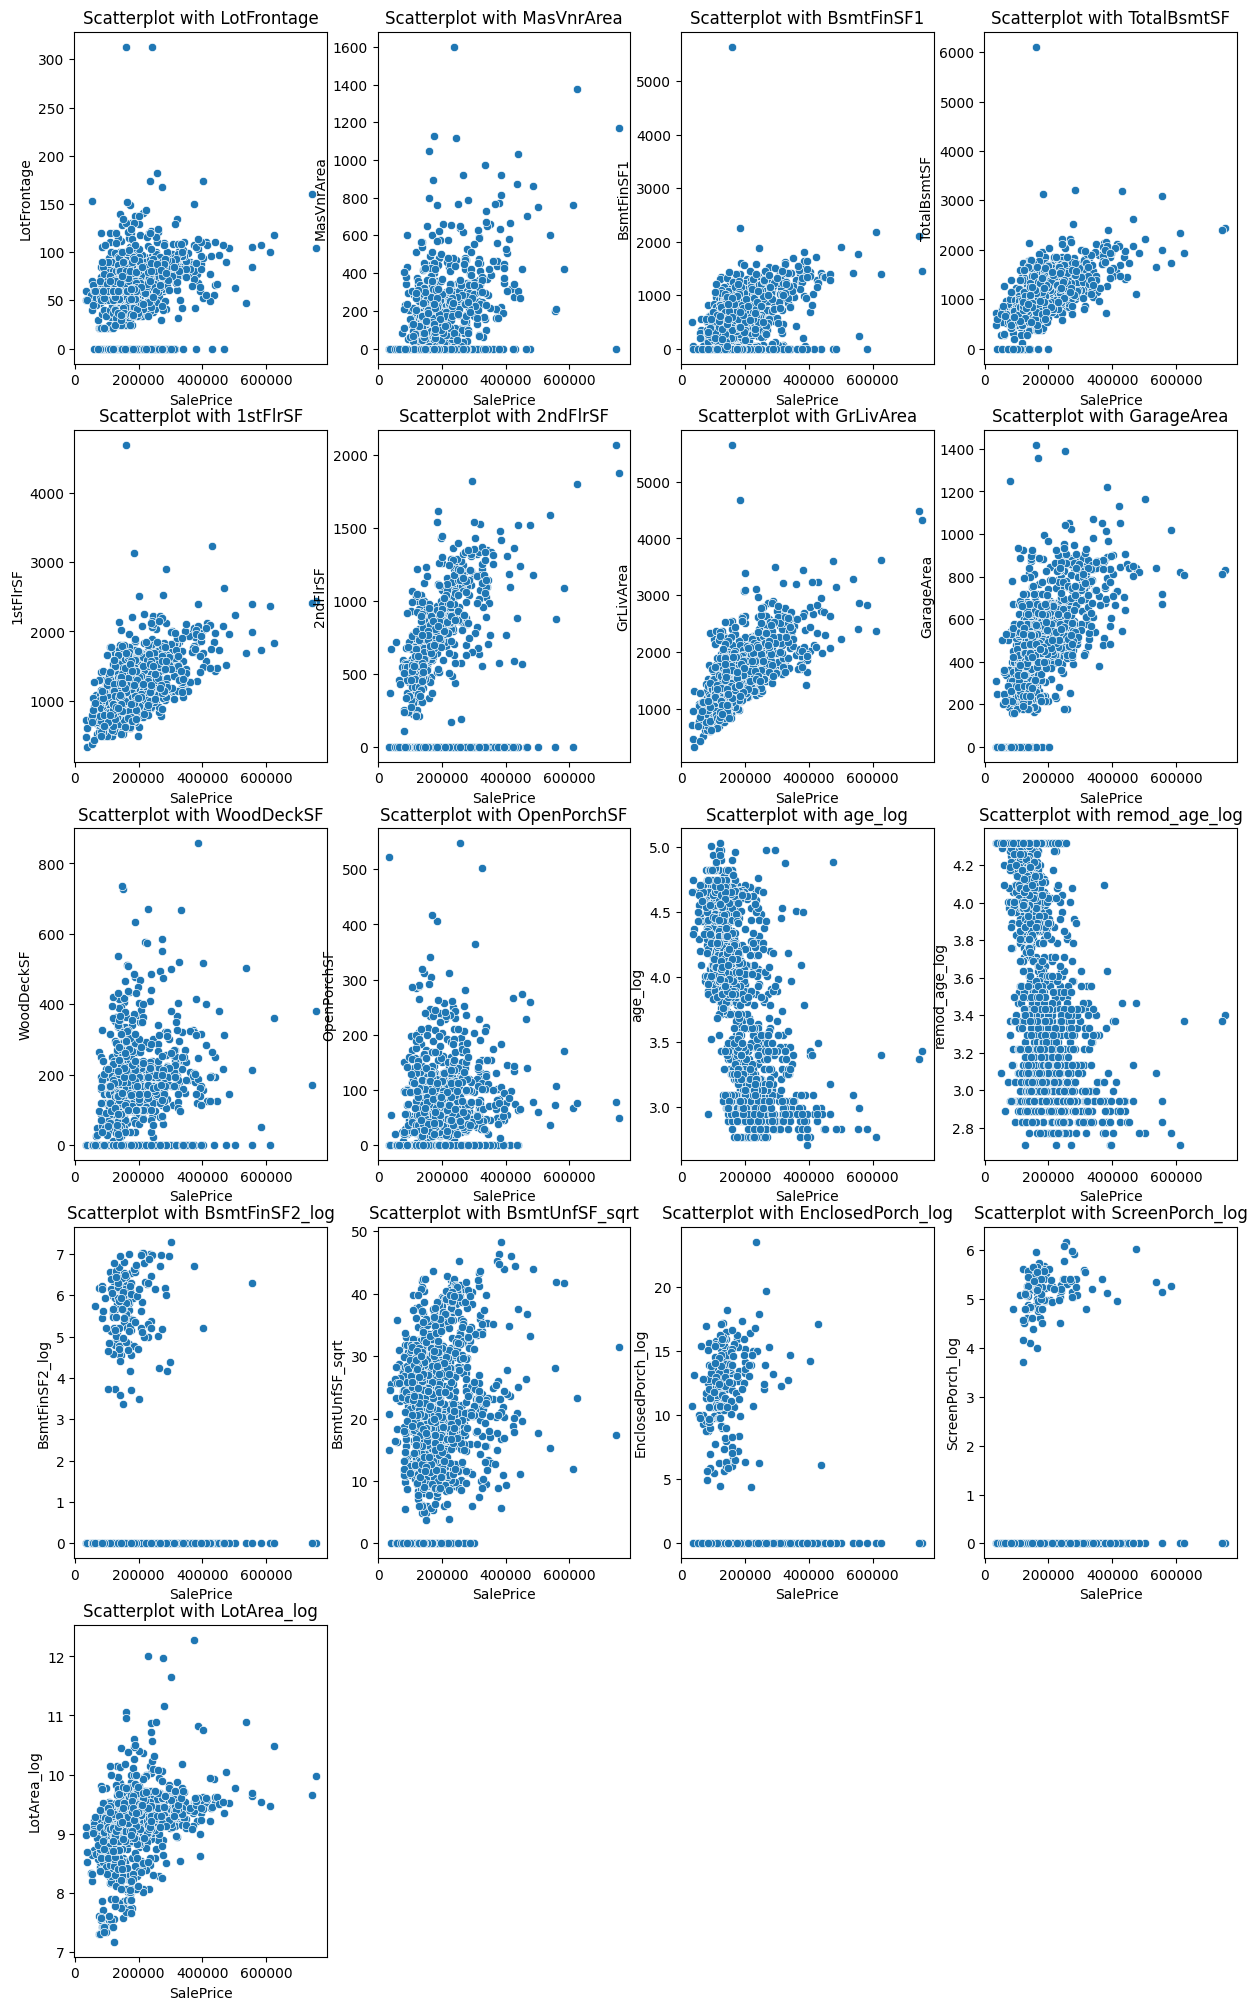

In [17]:
n_cols = 4
plt.figure(figsize=(15, 25))

numerical_variables = [column for column in df.columns if len(df[column].unique()) >= 50]
for i, col in enumerate(numerical_variables):
    ax = plt.subplot(len(numerical_variables) // n_cols + 1, n_cols, i+1)
    sns.scatterplot(data=df, x=target, y=col)
    ax.set_title("Scatterplot with " + col)

plt.show()

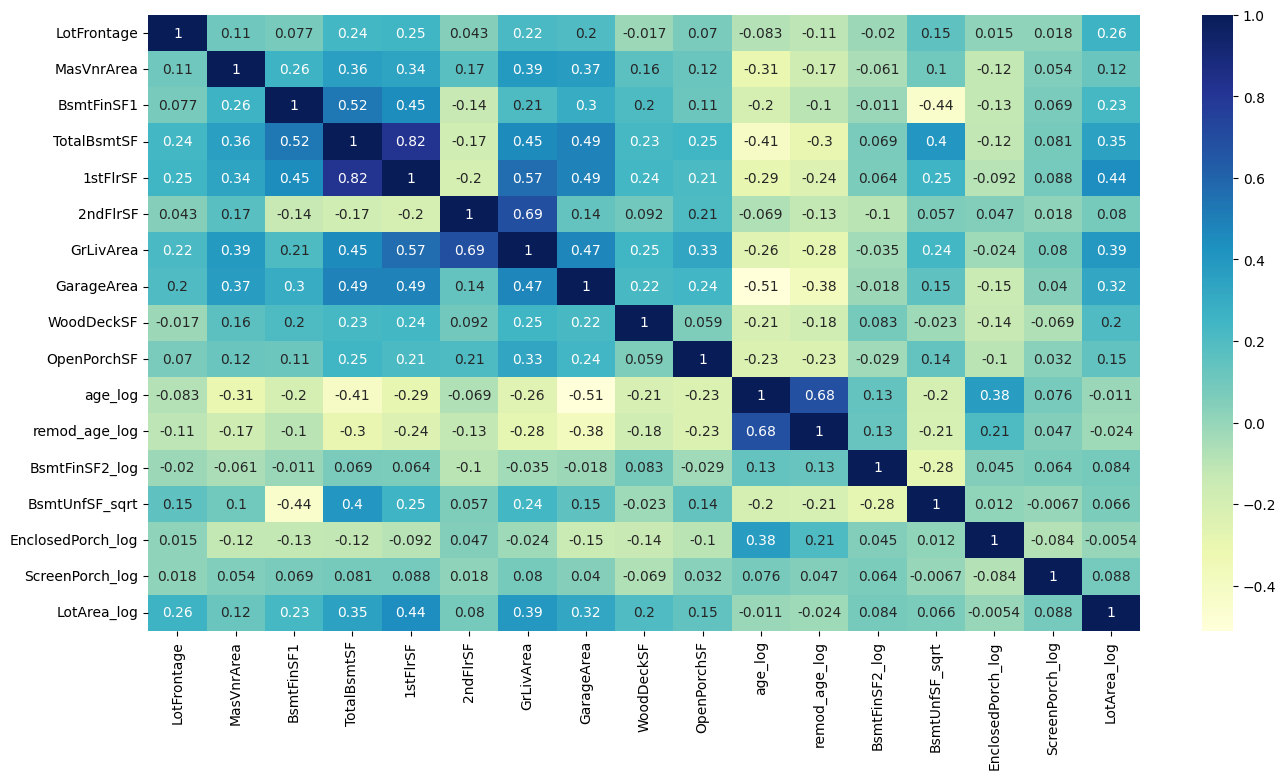

In [18]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.loc[:, numerical_variables].corr(), cmap="YlGnBu", annot=True)
plt.show()


### Dropping columns with high correlation 

In [19]:
df.drop(columns=['TotalBsmtSF', 'GrLivArea', 'remod_age_log'], axis=1, inplace=True)

In [20]:
for col in ['TotalBsmtSF', 'GrLivArea', 'remod_age_log']:
    numerical_variables.remove(col)

### Exploring cateogrical variables now


In [21]:

categorical_variables = [column for column in df.columns if len(df[column].unique()) < 50]

print("categorical", categorical_variables)

categorical ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


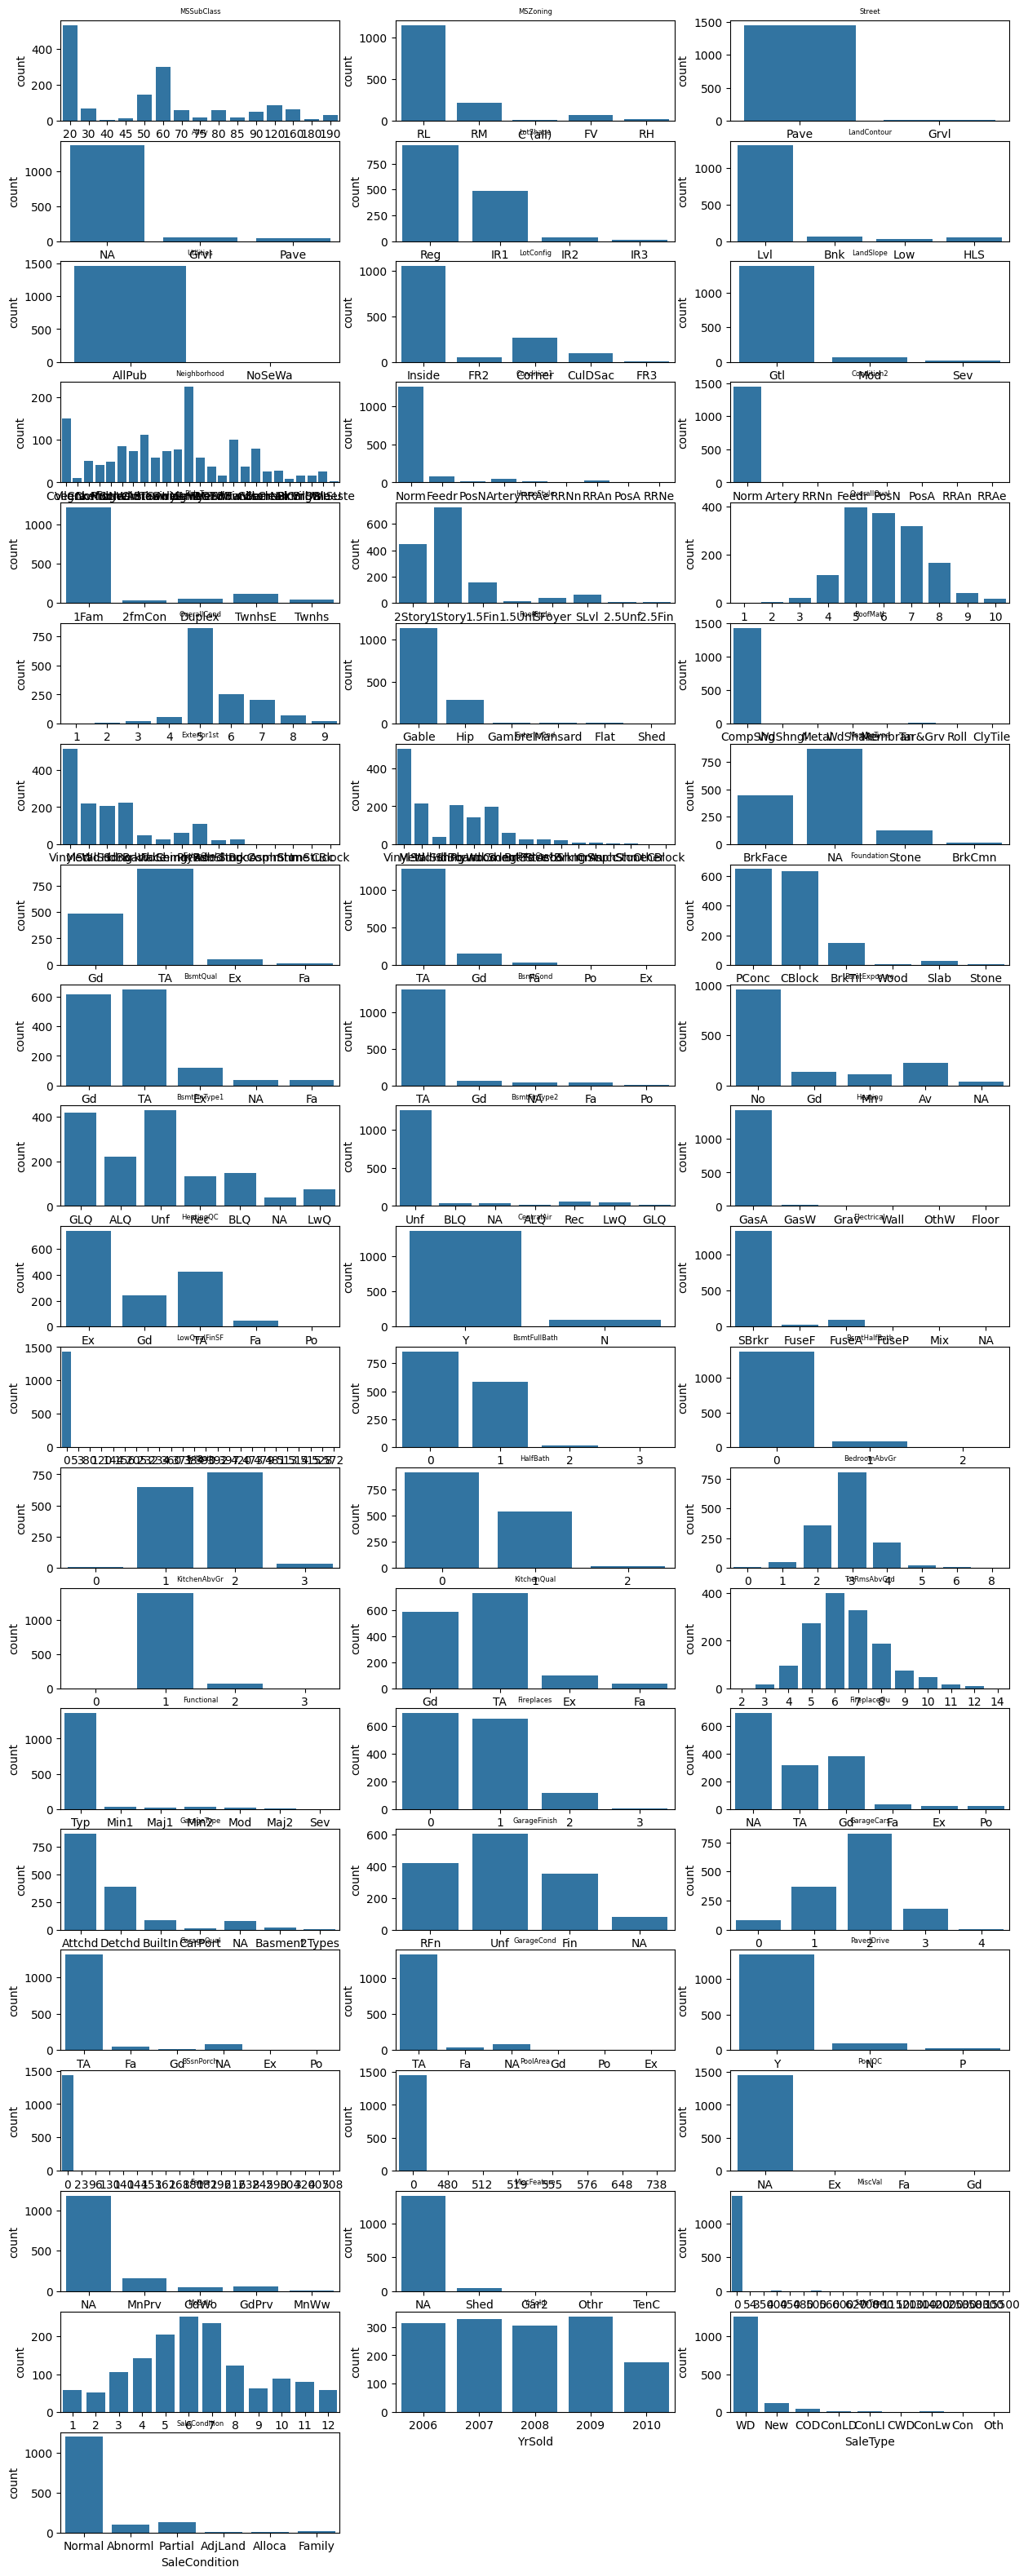

In [22]:
n_cols = 3
plt.figure(figsize=(15, 40))

for i, col in enumerate(categorical_variables):
    ax = plt.subplot(len(categorical_variables) // n_cols + 1, n_cols, i+1)
    sns.countplot(x=df[col])
    ax.set_title(col, fontsize=6)
plt.subplots_adjust()
plt.show()



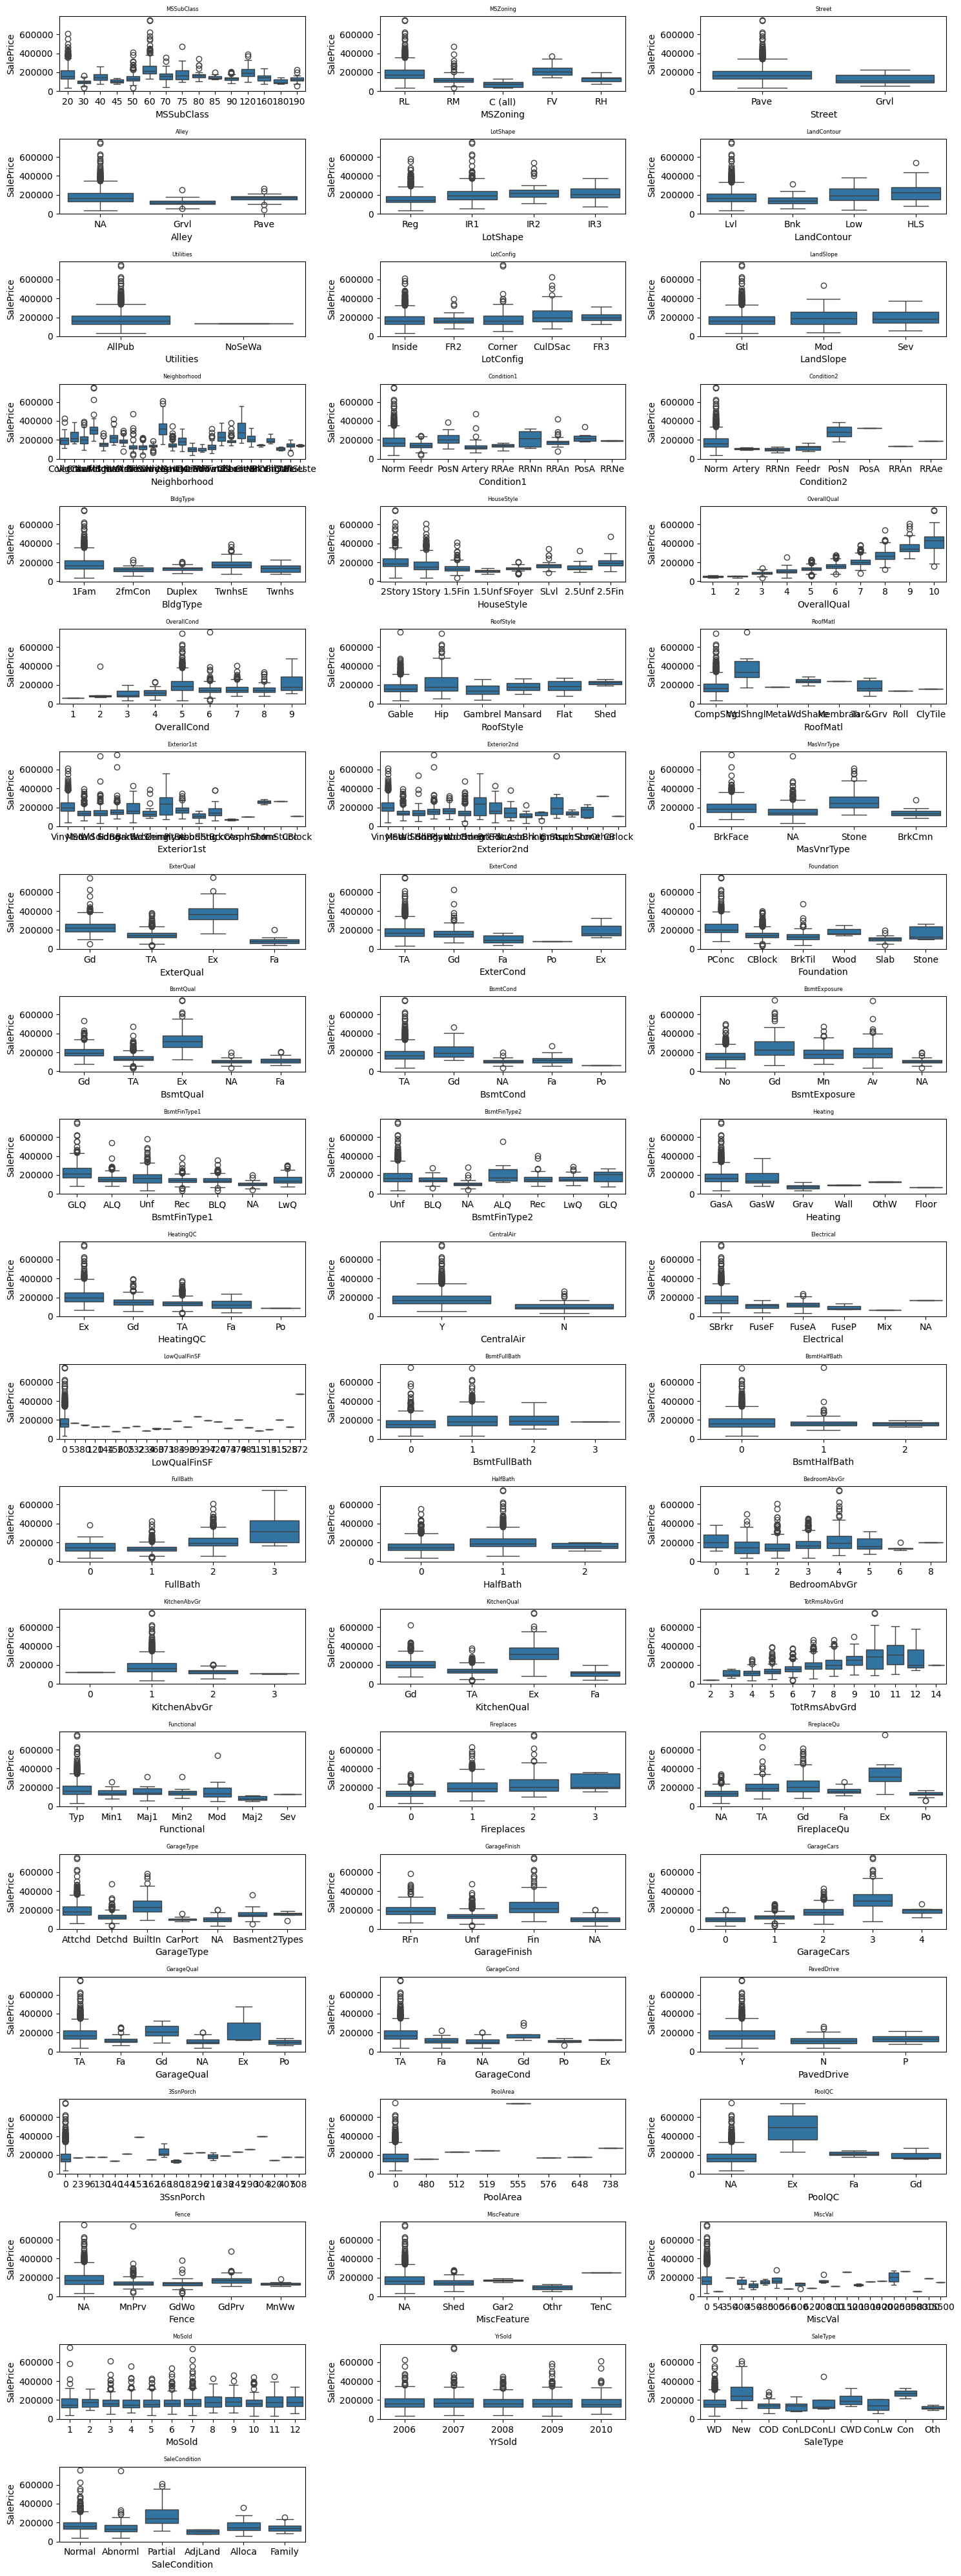

In [23]:
n_cols = 3
plt.figure(figsize=(15, 40))

for i, col in enumerate(categorical_variables):
    ax = plt.subplot(len(categorical_variables) // n_cols + 1, n_cols, i+1)
    sns.boxplot(x=df[col], y=target)
    ax.set_title(col, fontsize=6)
plt.tight_layout()
plt.show()

## Step 3: Preparing data
### Ordered and Unordered Variables

In [24]:
ordered_categorical = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'HeatingQC', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MoSold', 'YrSold']
unordered_categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']

In [25]:
orderings = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
    'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
    'CentralAir': ['Y', 'N'],
    'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
    'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
    'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA']
}

def apply_ordering(col, value):
    order = orderings[col]
    total = len(order)
    return total - (order.index(value) + 1)


In [26]:
ordered_categorical_modified = []
for col in ordered_categorical:
    if col not in orderings:
        ordered_categorical_modified.append(col)
        continue
    df[col + "_order"] = df[col].apply(lambda x: apply_ordering(col, x))
    ordered_categorical_modified.append(col + "_order")
    df.drop(col, axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,CentralAir_order,HeatingQC_order,KitchenQual_order,Functional_order,FireplaceQu_order,GarageFinish_order,GarageQual_order,GarageCond_order,PoolQC_order,Fence_order
0,60,RL,65.0,Pave,NA,Lvl,Inside,CollgCr,Norm,Norm,...,1,4,3,7,0,2,3,3,0,0
1,20,RL,80.0,Pave,NA,Lvl,FR2,Veenker,Feedr,Norm,...,1,4,2,7,3,2,3,3,0,0
2,60,RL,68.0,Pave,NA,Lvl,Inside,CollgCr,Norm,Norm,...,1,4,3,7,3,2,3,3,0,0
3,70,RL,60.0,Pave,NA,Lvl,Corner,Crawfor,Norm,Norm,...,1,3,3,7,4,1,3,3,0,0
4,60,RL,84.0,Pave,NA,Lvl,FR2,NoRidge,Norm,Norm,...,1,4,3,7,3,2,3,3,0,0


### Dummy columns preparation

In [27]:
dummy_col_dfs = []

for col in unordered_categorical:
    dummy_col_df = pd.get_dummies(df[col], drop_first=True, prefix=col)
    dummy_col_dfs.append(dummy_col_df)
    df.drop(col, axis=1, inplace=True)
df = pd.concat([df] + dummy_col_dfs, axis=1)

df.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

## Step 4: Splitting the Data into Training and Testing Sets

In [28]:
np.random.seed(0)
df = pd.concat([df] + [target], axis=1)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
y_train = df_train.pop('SalePrice')
X_train = df_train.astype(float)

In [30]:
y_test = df_test.pop('SalePrice')
X_test = df_test.astype(float)

### Rescaling numerical columns

In [31]:
numeric = df_train.select_dtypes(include=['float64', 'int64'])
variables_to_scale = numerical_variables + ordered_categorical_modified

for var in variables_to_scale:
    if var not in numeric: 
        print(var)
df_train.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

In [32]:
variables_to_scale = numerical_variables + ordered_categorical_modified
scaler = MinMaxScaler()
X_train[variables_to_scale] = scaler.fit_transform(X_train[variables_to_scale])
X_train.head()

,LotFrontage,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.214058,0.444444,0.625,0.00,0.082920,0.113889,0.000000,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
318,0.287540,0.666667,0.500,0.16,0.174876,0.231481,0.616949,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
239,0.166134,0.555556,0.375,0.00,0.016655,0.098611,0.333656,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
986,0.188498,0.555556,0.875,0.00,0.000000,0.145602,0.307022,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1416,0.191693,0.333333,0.625,0.00,0.000000,0.202315,0.505569,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [33]:
X_test[variables_to_scale] = scaler.transform(X_test[variables_to_scale])
X_test.head()

,LotFrontage,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.191693,0.333333,0.625,0.00000,0.109142,0.113889,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
57,0.284345,0.666667,0.500,0.00000,0.000000,0.112963,0.416465,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
780,0.201278,0.666667,0.500,0.02375,0.000000,0.203935,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
382,0.252396,0.666667,0.500,0.00000,0.000000,0.131250,0.415496,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1170,0.242812,0.555556,0.625,0.00000,0.092488,0.172685,0.000000,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Step 5: Building a model

### Ridge Regression

In [34]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
print(model_cv.best_params_)

{'alpha': 6.0}


In [36]:
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.63324027e+02  6.74869064e+04  2.45872706e+04  2.99297341e+04
  1.73032677e+04  5.13623648e+04  5.91291865e+04  6.44917862e+02
  1.93763484e+04  2.81517247e+03  3.19762245e+04  1.35026385e+04
  2.08957331e+03 -8.89365698e+03  3.87797878e+04  1.28194808e+04
  3.00572756e+04  2.21647842e+04  1.28279638e+04  5.83670082e+03
  1.11970762e+04  5.30523155e+03 -3.57133635e+03 -2.50984630e+03
 -6.10537790e+03  2.89893140e+02  3.45638653e+03  8.74963607e+01
  5.62025827e+03  3.16100320e+04  2.34785002e+03  6.45336707e+03
 -1.12270725e+04  2.31115281e+04 -1.77483646e+03  2.57979641e+04
 -1.56621959e+04  3.15868576e+04  1.33183005e+04  2.57851022e+03
  4.02267406e+03  5.39830622e+03  3.03227180e+04  1.06168929e+04
  9.43600222e+03  1.22546159e+04  2.57360910e+03 -5.63131684e+03
  1.24852054e+04 -1.09347261e+03 -5.18256589e+03 -1.35489011e+03
  4.85819508e+02  4.75644924e+03 -1.55042741e+03  1.68195711e+03
  1.89566593e+03 -1.95654930e+03 -3.00885529e+03 -2.16831030e+03
 -1.42518206e+04 -8.74762

#### R-Squared score using ridge regression

In [37]:
y_pred_train = ridge.predict(X_train)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = ridge.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8738389105903146
0.8615085624523866


### Lasso Regression

In [38]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
print(model_cv.best_params_)

{'alpha': 100}


In [40]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [41]:
lasso.coef_

array([-0.00000000e+00,  1.01767025e+05,  2.80731975e+04,  2.81454643e+04,
        0.00000000e+00,  1.79000547e+05,  1.17897619e+05,  0.00000000e+00,
        1.99221216e+04,  0.00000000e+00,  1.18768634e+04,  3.90922177e+03,
       -0.00000000e+00, -1.66102195e+04,  7.26541546e+03,  2.32353205e+03,
        3.93925555e+04,  0.00000000e+00,  4.46471313e+03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.24171330e+03, -1.12420379e+03,
       -0.00000000e+00, -5.03127920e+01, -2.95190374e+03, -0.00000000e+00,
        3.86878090e+03,  4.02873820e+04,  7.99969632e+02,  0.00000000e+00,
       -8.54102597e+03,  1.68499726e+04, -0.00000000e+00,  2.15332833e+04,
       -1.41315645e+04,  3.11686716e+04,  1.31522639e+04, -0.00000000e+00,
        1.37056512e+03,  2.20888559e+03,  2.63351574e+04,  1.07807092e+04,
        7.63878223e+03,  1.11594474e+04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.15136858e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

#### R-Squared score using Lasso Regression

In [42]:
y_pred_train = lasso.predict(X_train)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = lasso.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8870126008310613
0.8565430778903507


## Step 6: Validating Assumptions

Text(0.5, 0, 'Errors')

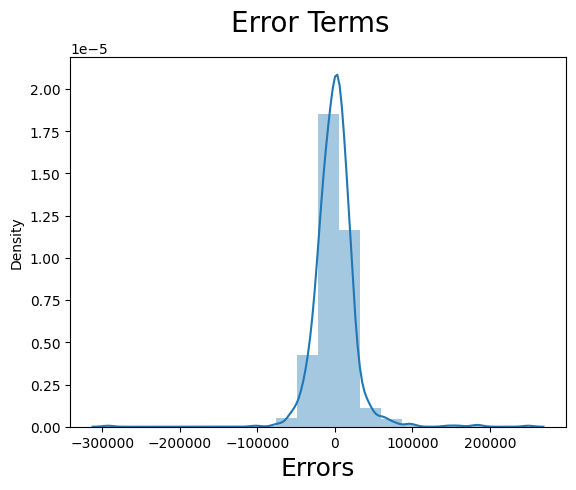

In [43]:
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'Residuals')

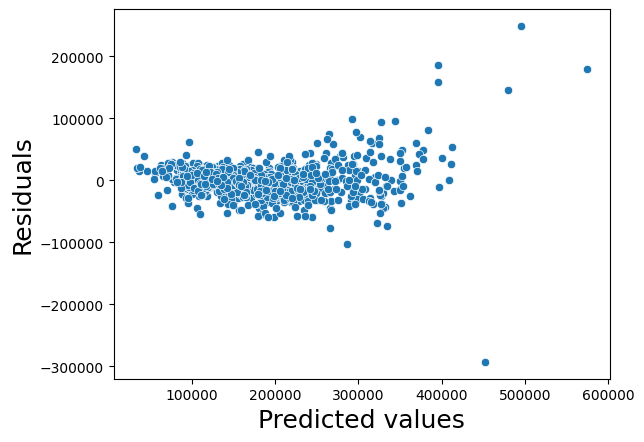

In [44]:
sns.scatterplot(y=(y_train - y_pred_train), x=y_pred_train)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Predicted values', fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)

#### Assignment Questions Rough Work Below

* What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?


In [45]:
alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=12)

In [46]:
y_pred_train = ridge.predict(X_train)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = ridge.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8591198363501585
0.8527078561875954


In [47]:
alpha = 200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=200)

In [48]:
y_pred_train = lasso.predict(X_train)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

y_pred_test = lasso.predict(X_test)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8666635457122317
0.8514812285401496


* What will be the most important predictor variables after the change is implemented?

In [49]:
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge.coef_
})
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient,Absolute_Coefficient
1,OverallQual,54366.206662,54366.206662
6,2ndFlrSF,42996.604630,42996.604630
92,Neighborhood_NoRidge,41237.162106,41237.162106
5,1stFlrSF,37508.177055,37508.177055
14,TotRmsAbvGrd,34116.567036,34116.567036
...,...,...,...
215,MiscVal_2500,0.000000,0.000000
205,MiscVal_560,0.000000,0.000000
213,MiscVal_1400,0.000000,0.000000
212,MiscVal_1300,0.000000,0.000000


In [50]:
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_
})
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient,Absolute_Coefficient
5,1stFlrSF,143961.484293,143961.484293
1,OverallQual,109316.499507,109316.499507
6,2ndFlrSF,96624.598905,96624.598905
139,RoofMatl_WdShngl,54882.801323,54882.801323
92,Neighborhood_NoRidge,50401.209939,50401.209939
...,...,...,...
104,Condition1_PosA,0.000000,0.000000
105,Condition1_PosN,-0.000000,0.000000
106,Condition1_RRAe,-0.000000,0.000000
107,Condition1_RRAn,0.000000,0.000000


 * After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [51]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [52]:
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_
})
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient,Absolute_Coefficient
5,1stFlrSF,179000.546722,179000.546722
113,Condition2_PosN,-177186.866030,177186.866030
6,2ndFlrSF,117897.618619,117897.618619
1,OverallQual,101767.025183,101767.025183
139,RoofMatl_WdShngl,91839.763413,91839.763413
...,...,...,...
123,HouseStyle_2.5Fin,-0.000000,0.000000
124,HouseStyle_2.5Unf,-0.000000,0.000000
126,HouseStyle_SFoyer,-0.000000,0.000000
127,HouseStyle_SLvl,-0.000000,0.000000


In [53]:
X_train_new = X_train.drop(columns=['1stFlrSF', 'Condition2_PosN', '2ndFlrSF', 'OverallQual', 'RoofMatl_WdShngl'])

In [54]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


In [55]:
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
print(model_cv.best_params_)

{'alpha': 100}


In [57]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [58]:
feature_names = X_train_new.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso.coef_
})
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient,Absolute_Coefficient
11,TotRmsAbvGrd,83223.207042,83223.207042
26,LotArea_log,72517.493702,72517.493702
89,Neighborhood_NoRidge,67049.944003,67049.944003
7,FullBath,49542.472552,49542.472552
32,BsmtQual_order,48767.848153,48767.848153
...,...,...,...
133,RoofMatl_Tar&Grv,-0.000000,0.000000
132,RoofMatl_Roll,-0.000000,0.000000
131,RoofMatl_Metal,-0.000000,0.000000
130,RoofMatl_Membran,0.000000,0.000000
